# Deep Dive into Principal Component Analysis (PCA).



# Table of Contents

1. [Introduction.](#introduction)

2. [Principal Component Analysis (PCA) Intuition.](#intuition)

3. [PCA Mathemathical Formulation.](#math)

4. [Principal Component Analysis (PCA) in Practice.](#practice)

  4.1 [PCA for Dimension Reduction.](#dim_reduction)
  
  4.2 [PCA for Visualization and Better Insights.](#visualization)
  
  4.3 [PCA for Noise Filtering.](#filter_noise)
  
  4.4 [PCA as a Preprocessor for ML algorithms.](#pre_processor)
  
5. [Summary.](#summary)  

## 1. Introduction<a name="introduction"></a>

In this Notebook, we will explore Principal Component Analysis from various perspectives.

We will first give a short intuitive explanation for principal component analysis and why it makes sense? Then we will go deeper into the actual derivation of Principal Components using the principal of maximizing the total projected variance onto components. Once have understand the theory and concept, we will dive deeper into the use cases and examples. We will consider following four scenario with examples : 
  1. Dimension Reduction
  2. Visualization
  3. Noise Filtering
  4. As a pre-processor for ML algorithms.
In the end, we will summarize our discussion with various pointers to other alternatives to PCA



## 2. Principal Component Analysis (PCA) Intuition.<a name="intuition"></a>

##### 2.1. Why Dimension reduction make sense?

In real life, the data is generated from fixed degree of freedom and when we collect data, there are noise added or sometimes we don't know the actual dimensions . These all means that to represent a data, we use a lot of dimension then that was used by data generation process. However, since we don't always have information about the data generation. It would be nice to have a tool, which can remove the unnecessary dimensions. 

Examples: Consider the black and white image of digits like in [MNIST Digit Database](https://en.wikipedia.org/wiki/MNIST_database). Each image is 28x28 == 784 pixels or 784 dimensions. However, most of the pixels are white and most of the digit are generated by a combination of vertical, horizontal and rotation stroke i.e data is generated by about 3 dimensions.

##### 2.2. What is Dimensionality Reduction

Dimensionality reduction is choosing a basis or mathematical representation within which you can describe most but not all of the variance within your data, thereby retaining the relevant information, while reducing the amount of information necessary to represent it. There are a variety of techniques for doing this including but not limited to PCA, ICA, and Matrix Feature Factorization. These will take existing data and reduce it to the most discriminative components. All of these allow you to represent most of the information in your dataset with fewer, more discriminative features.

##### 2.3. Why is Dimensionality Reduction Useful?

In terms of performance, having data of high dimensions is problematic because:

* It can mean high computational cost to perform learning and inference and

* It often leads to over-fitting when learning a model, which means that the model will perform well on the training data but poorly on test data.

Dimensionality reduction addresses both of these problems, while (hopefully) preserving most of the relevant information in the data needed to learn accurate, predictive models.

Also note that, in general visualization of lower dimension data and it's interpretation are more straightforward and it could be used for getting better insights into the data.



##### 2.3 Intuition of PCA.

The intuition behind PCA (Principal component analysis) is remarkably simple. What we ask is given a dataset, can we represent the dataset using lesser number of dimensions?

In the following picture, we can see that the original data spans in 3D but most of the information is contained in the 2D plan which is oriented around at 45 degree on x-y plane.
The second picture shows how the 3D information is represented in the 2D plane.

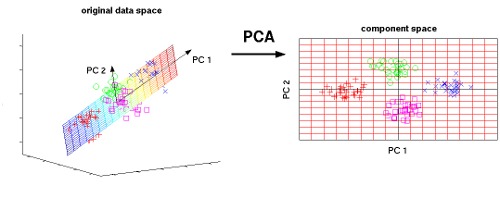


[Source [Matthias Scholz Thesis](http://phdthesis-bioinformatics-maxplanckinstitute-molecularplantphys.matthias-scholz.de/)] [License a Creative Commons - Attribution license]

##### 2.4 PCA transformation

In general, dataset will be spread across multiple axes in the n dimensional space. It is natural that the spread (aka variance) will be different in the direction of those axes. The next question, we  ask is : Can we only pick the axes where the variances is more and remove the axes and data variances are low. Note that the maximum variance need not be in the direction of the original axes but in the direction which is the linear combination of the subset of the original axes. Principal component analysis (PCA) rotates the original data space such that the axes of the new coordinate system points to the direction of the highest variance of the data. User can chose a subset of the rotated axes thus resulting in the reduction of noise and also reduction in the data size.

See the following links for more details:

[nlpca](http://www.nlpca.org/pca_principal_component_analysis.html)

[wiki](https://en.wikipedia.org/wiki/Principal_component_analysis)



## 3. PCA Mathemathical formulation.<a name="math"></a>

If we would like to approximate real dataset with approximate dataset, we would need to have some way to measure the discrepancy between real and approximate dataset. There are multiple ways to derive PCA, we will chose one of them i.e variance of the projected data onto the reduced rotated dimensional axes i.e principal component is maximized. Since having a maximum variance preserve as must information as possible as compare to minimum variance.


Before we move forward, lets define some of the terms:
##### 3.1 Convention Used.


| Symbol        | description                                                 |
|:--------------|:------------------------------------------------------------|
| $x_{4}$       | scalar is represented as lowercase with dimensional subscript |
| $\mathbf{x} $ | vector is represented as a bold lowercase                   |
| $\mathbf{X} $ | matrix is represented as bold uppercase                   |


##### 3.2. Defination of Statistical and Matrix Operations.

Lets defined some of terms related to statistics and Matrix operations.


##### 3.2.1. Scalar Variable.

When we collect data each of the measurement is scalar. We could collect N samples of each scalar.


###### 3.2.2. Vector variable.

During data collection, we might measure various attributes, for example age, gender etc of the test subject.
To compactly represent M scalars for each subject i.e sample, vector is used, it is just a tuple of M scalars and uniquely describes a point in M dimensional space.

###### Represenation of a Sample using Vector.
Let the original input dataset be represented by M number of dimensions i.e each sample consist of M different 1D data point and together they form a sample data point column vector. $ \mathbf{x}  = (x_{1}, x_{2} \cdots x_{M})^{T} $. 


Since we will be having N different data point, we would like to suffix $ i $ for the i'th sample and the i'th data point vector is 
$$ \mathbf{x_{i}}  = (x_{i1}, x_{i2} \cdots , x_{iM})^{T} $$ 

(**Note**: We use Transpose operation to compactly represent column vector as row vector.)

##### Representation of a Principal Component using Vector.

As we talked before that we will first project the standardized dataset on to K principal 
components with $ K \in \{{1, 2, \cdots, M}\}$. Lets call $\mathbf{p_{j}}$ a M dimentional vector representing the direction of j'th principal 
$$ \mathbf{p_{j}}  = (p_{j1}, p_{k2} \cdots , p_{jM})^{T} $$ 


There are a couple of points to be noted about $\mathbf{p_{j}}$

* each $\mathbf{p_{j}}$ lives in the space of M dimension i.e space of standardized or original data space i.e $dim(\mathbf{p_{j}}) == M$

* Since we are only interested in the direction we will assume i.e each of $p_{j}$ is [unit vector](https://en.wikipedia.org/wiki/Unit_vector) i.e $\|\mathbf{p_{j}}\|_{2}==1$ without loss of generality.




###### 3.2.3. Matrix Variable.

##### Representation of Whole Dataset.
As we noted in previous sub section that each subject or sample can be represented by one column vector. If we take N such measurement, we can compactly represent all those N measurements across M dimension using $ N \times M $ matrix.

$$ \mathbf{X} = ( \mathbf{x_{1}}^{T}, \mathbf{x_{2}}^{T}, \cdots  \mathbf{x_{i}}^{T} \cdots ,\mathbf{x_{n}}^{T} )^{T}
$$



###### Representation of K Principal Component Direction.

There are total K numbers of principal components i.e we have $\mathbf{p_{1}}, \mathbf{p_{2}}, \cdots , \mathbf{p_{k}}$ i.e we can compactly represent them as a $K X M $ matrix. $\mathbf{P} = ( \mathbf{p_{1}}^{T}, \mathbf{p_{2}}^{T}, \cdots  \mathbf{p_{i}}^{T} \cdots ,\mathbf{p_{k}}^{T} )^{T}$ with $ K \in \{{1, 2, \cdots, M}\}$.





##### 3.2.4. Standardization of Data Points.


To get standardized data, we will shift each of the dimensions by its mean. The advantage of this would be simpler math.

We would also like to divide it by dispersion i.e standard deviation because this will remove any bias associated with measuring units i.e measurement in inch vs cm etc.

it means new i'th sample is represented as $\mathbf{s_{i}}  = (s_{i1}, s_{i2} \cdots , s_{id})^{T}$ i.e a column vector of standardized dimensions $s_{ij}$

Each of the i'th samples' j'th dimension is represented as follows

$$s_{ij} = \frac{x_{ij} - \overline{x_{j}}}{ \sigma_{x_{j}}}$$


 
Where
  * Average for j'th dimension $  \Rightarrow  \overline{x_{j}} = \frac{1}{N}\Sigma x_{ij} $
  
  * Standard Variance for j'th dimension  $  \Rightarrow  \sigma_{x_{j}} = \sqrt[2]{\frac{1}{N}\sum_{i=1}^{N}(x_{ij} - \overline{x_{j}})^2}$
  
  
and new standardized data matrix of size $ N \times M $ becomes 

$ \mathbf{S} = ( \mathbf{s_{1}}^{T}, \mathbf{s_{2}}^{T}, \cdots  \mathbf{s_{i}}^{T} \cdots ,\mathbf{s_{n}}^{T} )^{T}
$


###### 3.2.1. Variance of One Dimensional i.e Scalar Variable.


  If we take N samples of a random variable $v$ with zero mean, then it's [variance](https://en.wikipedia.org/wiki/Variance) is given by 
$$variance(v) = \frac{1}{N}\sum_{i=1}^{N}v^2$$



##### 3.2.2. Length of a Vector.

M dimensional Vector is a point in M dimensional space and it has direction as well as magnitude. The idea of vector norm is motivated from the euclidean distance in our usual 3D space. If we have a point in 3D specified by vector $\mathbf{v} = (x, y, z)$ then it's distance from origin or length is given by following expression


$$
\begin{equation}
\begin{split}
dist(\mathbf{v}, \mathbf{0}) &= norm_{2}(\mathbf{v}) \\
& = \|\mathbf{v}\|_{2} \\
& = \sqrt[2]{x^{2} + y^{2} + z^{2}} \\
& = \sqrt[2]{\mathbf{v}^{T}\mathbf{v}} && \text{from defn of dot_product)}
\end{split}
\end{equation}
$$

To generalize, above expression, if we have M dimensional vector $\mathbf{p_{k}}$ then it's $norm_2$ is given as:

$$
$$
\begin{equation}
\begin{split}
dist(\mathbf{p_{k}}, \mathbf{0}) &= norm_{2}(\mathbf{p_{k}}) \\
& = \|\mathbf{p_{k}}\|_{2} \\
& = \sqrt[2]{ p_{k1}^{2} + p_{k2}^{2} + \cdots + p_{kj}^{2} + \cdots + p_{kM}^{2}} && \text{; $ p_{kj}\ \forall j \in \{{1, 2, \cdots, M}\} $ are the dimensions of vector $\mathbf{p_k}$}\\
& = \sqrt[2]{\mathbf{p_{k}}^{T}\mathbf{p_{k}}} && \text{;from defn of dot_product}
\end{split}
\end{equation}
$$
$$


###### 3.2.3. Vector Projection.
 [Vector projection](https://en.wikipedia.org/wiki/Vector_projection) is given by [dot product](https://en.wikipedia.org/wiki/Dot_product). i.e if we project vector $\mathbf{a}$ onto vector $\mathbf{b}$, then followings holds true:

$$ project\_\mathbf{a}\_onto\_\mathbf{b} = dot\_product(\mathbf{a}, \mathbf{b}) = \mathbf{a} \cdot \mathbf{b} = \mathbf{a}^{T} \mathbf{b} $$



 In our case, projection  on a M dimensional point $\mathbf{s_{i}}$ vector onto a principal component $\mathbf{p_{k}}$ is given by dot product as follows:

$$ project\_\mathbf{s_{i}}\_onto\_\mathbf{p_{k}} = dot\_product(\mathbf{s_{i}}, \mathbf{p_{k}}) = \mathbf{s_{i}} \cdot \mathbf{p_{k}} =  \mathbf{s_{i}}^{T} \mathbf{p_{k}}$$



##### 3.2.4. How to Represent a Scalar using Dot Product.

While deriving PCA, we will use this standard trick of representing a scalar as a dot product.
If a variable $v$ is scalar, then it's square can be represented as dot product as follows:
  
$$ v^{2} = dot\_prodct(v, v) = v \cdot v = v^{T}v$$

i.e self dot product of scalar variable is just it's multiplication with itself.

##### 3.2.5. Transpose of Product of Matrices.

 [Transpose of the product of vector i.e $Nx1$ matrix](https://proofwiki.org/wiki/Transpose_of_Matrix_Product) is given by following:
 
$$ (\mathbf{a}\mathbf{b})^{T} = \mathbf{b}^{T}\mathbf{a}^{T} $$  


##### 3.2.6 Covariance of M Dimensional Vector.

If we collect N samples for one dimensional data, then we know that using mean and variance (aka sufficient statistics), we can get a good perspective on data. In short, using sufficient statistics i.e mean and variance allows us to have compression and remove the noise. The natural question is what to do when we have more than one dimensions to data i.e say M dimensions. Well how about characterizing it by M mean and M variances? This seems intuitively right, but here we are assuming that there is no co-relation or co-variance between any two dimensions. What if we want to account for this? The approach would be to compute variances between two dimensions and it is called co-variance. Since we have assumed without loss of generality that each dimension has zero mean. We can define covariance between them. Thus, with about $MxM$ parameters, we can represent our dataset.

We will assume the dataset as described in section 3.2.4 above. Where we collect N samples for each of M dimensions.

Let's also define $\mathbf{ss_{k}}$ as the k'th column of matrix $\mathbf{S}$ i.e $\mathbf{ss_{k}}$ represents all the samples we collected for the k'th dimensions and is defined as
$$ \mathbf{ss_{k}} = (s_{1k}, s_{2k}, \cdots ,s_{nk})^{T} $$

The [Co-variance Matrix](https://en.wikipedia.org/wiki/Covariance_matrix) is $M \times M$ matrix and is defined as:

$$\Sigma = (\Sigma_{ij}) \in \Re^{M \times M}$$

* Each $\Sigma_{ij}$ is a covariance of i'th and j'th dimensions and is given by

$$ 
\begin{equation}
\begin{split}
\Sigma_{ij} &= cov(\mathbf{ss_{i}}, \mathbf{ss_{j}}) \\
 &= \mathbb{E}(\mathbf{ss_{i}}, \mathbf{ss_{j}}) && \text{;from the defn of covariance with zero means}\\
 &= \frac{1}{N} \sum_{m=1}^{N}(ss_{mi} \times {ss_{mj}})
\end{split}
\end{equation}
$$

Note that the above expression can be compactly represented in [co-variance matrix form](https://en.wikipedia.org/wiki/Covariance_matrix#Definition)
$$
\begin{equation}
\begin{split}
\Sigma &= \mathbb{E}(\mathbf{s}\mathbf{s}^{T}) && \text{;from defn of co-variance}\\
& = \frac{1}{N}\sum_{i=1}^{N}(\mathbf{s_{i}}\mathbf{s_{i}}^{T})
\end{split}
\end{equation}
$$


## 3.3 Derivation using Total Maximum Variances of Data Projection.

Now we are ready to derive the expression for all the principal components. Note that since, we would like to maximize the total projected variances. Total variances will be sum of the variances along each of the principal component. So to simplify our problem statement, we can find the expression for an arbitrary principal component i.e $\mathbf{p_{k}}$ and then generalize it for other principal components.



##### 3.3.1 Finding best Principal Component by Maximizing Projected Variances onto Principal Component.

We can write variance of the projection of M dimensional N points (i.e vectors) $\mathbf{s_{1}}, \mathbf{s_{1}}, \cdots , \mathbf{s_{n}}$ onto a arbitrary principal component $\mathbf{p_{k}} ,\ \ \ \forall k \in {\{1, 2, \cdots, M}\}$  as 
  
$$
\begin{equation}
\begin{split}
  total\_projected\_variance\_on\_\mathbf{p_{k}} & = variance\_of\_projection\_of\_N\_points\_onto\_\mathbf{p_{k}} \\
  & = variance(projection(\mathbf{s_{1}}, \mathbf{p_{k}}), projection(\mathbf{s_{2}}, \mathbf{p_{k}}) \cdots, projection(\mathbf{s_{n}}, \mathbf{p_{k}}) ) \\
  & = variance(\mathbf{s_{1}}^{T}\mathbf{p_{k}}, \mathbf{s_{2}}^{T}\mathbf{p_{k}} \cdots,\mathbf{s_{n}}^{T}\mathbf{p_{k}} )) && \text{;From defn of projection (see 3.2.3 above)} \\
  & = \frac{1}{N}\sum_{i=1}^{N}(\mathbf{s_{i}}^{T} \mathbf{p_{k}})^2 & & \text{;From defn of variance (see 3.2.1 above)} \\
  & = \frac{1}{N} \sum_{i=1}^{N}(\mathbf{s_{i}}^{T} \mathbf{p_{k}})^{T}(\mathbf{s_{i}}^{T} \mathbf{p_{k}}) && \text{;Scalar and dot product representation (see 3.2.4 above)} \\
  & = \frac{1}{N} \sum_{i=1}^{N}(\mathbf{p_{k}}^{T}(\mathbf{s_{i}}^{T})^{T})(\mathbf{s_{i}}^{T} \mathbf{p_{k}}) && \text{;Transpose of matrix product (see 3.2.5 above)} \\
    & = \frac{1}{N} \sum_{i=1}^{N}(\mathbf{p_{k}}^{T}\mathbf{s_{i}})(\mathbf{s_{i}}^{T} \mathbf{p_{k}}) && \text{;Since transpose is an involution i.e self inverse i.e transpose of transpose is original vector} \\
  & = \frac{1}{N} \sum_{i=1}^{N}\mathbf{p_{k}}^{T}(\mathbf{s_{i}}\mathbf{s_{i}}^{T}) \mathbf{p_{k}} && \text{;Associativity of matrix product} \\
  & = \mathbf{p_{k}}^{T}(\frac{1}{N} \sum_{i=1}^{N}(\mathbf{s_{i}}\mathbf{s_{i}}^{T})) \mathbf{p_{k}} && \text{;Since summation doesn't involve k, we can bring terms containing k out of summation} \\
 & = \mathbf{p_{k}}^{T} \mathbf{\Sigma} \mathbf{p_{k}} && \text{;From the defn of covariance matrix as explained in 3.2.6}
\end{split}
\end{equation}
$$



As explained in previous sections, we would like to maximize the projected variances onto an arbitrary principal component. Above expression of total projected variances on an arbitrary principal component $\mathbf{p_{k}}$ can be cast as the constrained maximization problem aka as [Method of Lagrange Multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier). 

What should be the constraints? The obvious constraint on vector $\mathbf{p_{k}}$ is that it has to be of constant length. 

Why is it so? To understand it, lets assume that it is not constant and is variable. Since the expression of maximum projected variances involves product of  $\mathbf{p_{k}}$ and $\Sigma$,  the maximizing process will make length of $\mathbf{p_{k}}$ i.e $norm_2(\mathbf{p_{k}})$ (see 3.2.2  above), to be as maximum as possible which is infinity. And when $norm_2(\mathbf{p_{k}}) \rightarrow \infty $, we don't have a solution and hence it proves that $norm_2(\mathbf{p_{k}})$ must be constant to have a reasonable solution.

For mathematical convenience, we will choose $\mathbf{p_{k}}$'s length to be 1.

In compact notation, we have this numerical optimization formulation:

$$
\begin{equation}
\begin{split}
  & maximize(\mathbf{p_{k}}^{T} \mathbf{\Sigma} \mathbf{p_{k}}) \\
  & subject\ to\ \mathbf{p_{k}}^{T}\mathbf{p_{k}} = 1
\end{split}
\end{equation}
$$

**Note**: We use the definition of [unit vector](https://en.wikipedia.org/wiki/Unit_vector) i.e a vector whose norm is unity.

Using [Method of Lagrange Multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier), we can write above expression as 

$$
 maximize(\mathbf{function}(\mathbf{p_{k}})) = maximize(\mathbf{p_{k}}^{T} \mathbf{\Sigma} \mathbf{p_{k}} + \lambda_{k}(1-\mathbf{p_{k}}^{T}\mathbf{p_{k}}))
$$
**Note**: $\lambda_{k}$ is positive scalar.

Now we must find, maximum of above expression, we know from calculus that a [function's maximum value can be found using the first and second derivatives](https://en.wikipedia.org/wiki/Derivative_test#First_derivative_test). What is our variable here? Since we want to find the unknown unit vector $\mathbf{p_{k}}$ it is our variable. (**Note**: even if magnitude is constant, direction is variable). Hence, we will differentiate it with $\mathbf{p_{k}}$. 

Here we would advise user to look at the details of [Matrix Calculus](https://en.wikipedia.org/wiki/Matrix_calculus).

**First derivative is given by:**

$$
\begin{equation}
\begin{split}
\frac{\partial^1(\mathbf{function}(\mathbf{p_{k}}))}{\partial \mathbf{p_{k}}^1} &= \frac{\partial^1(\mathbf{p_{k}}^{T} \mathbf{\Sigma} \mathbf{p_{k}} + \lambda_{k}(1-\mathbf{p_{k}}^{T}\mathbf{p_{k}}))}{\partial \mathbf{p_{k}}^1} \\
& = 2\mathbf{\Sigma}\mathbf{p_{k}} - 2\lambda_{k}\mathbf{p_{k}}
\end{split}
\end{equation}
$$

The condition for critical points (i.e maximum or minimum) is that each component of first vector derivative should be zero i.e 

$$2\mathbf{\Sigma}\mathbf{p_{k}} - 2\lambda_{k}\mathbf{p_{k}} = \mathbf{0}$$
$$\Rightarrow \mathbf{\Sigma}\mathbf{p_{k}} = \lambda_{k}\mathbf{p_{k}} $$

The above condition is saying that, if we have to maximize or minimize the projected variance onto $\mathbf{p_{k}}$, then
transformation done by the sample data's co-variance matrix must be equal to the scaling of the $\mathbf{p_{k}}$ and this is precisely the definition of [eigenvectors and eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors).


**Second derivative is given by:**
$$
\begin{equation}
\begin{split}
\frac{\partial^2(\mathbf{function}(\mathbf{p_{k}}))}{\partial \mathbf{p_{k}}^2} &= \frac{\partial^1 (\frac{\partial^1(\mathbf{p_{k}}^{T} \mathbf{\Sigma} \mathbf{p_{k}} + \lambda_{k}(1-\mathbf{p_{k}}^{T}\mathbf{p_{k}}))}{\partial \mathbf{p_{k}}^1})}{\partial \mathbf{p_{k}}^1} \\
& = \frac{\partial^1 (2\mathbf{\Sigma}\mathbf{p_{k}} - \lambda_{k}\mathbf{p_{k}})}{\partial \mathbf{p_{k}}^1} \\
& = 2\mathbf{\Sigma} - \lambda_{k}
\end{split}
\end{equation}
$$

The condition on a critical point (found by first derivative) to be maximum is that second vector derivative must be positive for each component. i.e

$$2\mathbf{\Sigma} - \lambda_{k} \succ \mathbf{0} \ \ \ \text{; Each element is greater than zero} $$
$$\Rightarrow \mathbf{\Sigma} \succ \frac{\mathbf{0} +  \lambda_{k}}{2}$$
$$\Rightarrow \mathbf{\Sigma} \succ \mathbf{0} \ \ \ \text{; Since $\lambda_{k}$ is positive}$$

The above condition is saying that co-variance matrix of data i.e $\mathbf{\Sigma}$ must be [positive definite](https://en.wikipedia.org/wiki/Positive-definite_matrix).

###### Additional Principal Components.

Note that in the previous sub-section, we didn't assume anything about $\mathbf{p_{k}}$. Hence, following the above procedure, we could find other principal components i.e $\mathbf{p_{1}}, \mathbf{p_{2}}, \cdots  \mathbf{p_{i}} \cdots ,\mathbf{p_{k}}$ with $ k <= M$. For  mathematical convenience, we choose all the [principal components to be orthogonal to each other](http://mathworld.wolfram.com/OrthogonalVectors.html). i.e 

$$
\begin{equation}
dot\_product(\mathbf{p_{i}},\mathbf{p_{j}})  = \mathbf{p_{i}}\cdot\mathbf{p_{j}} = \mathbf{p_{i}}^{T}\mathbf{p_{j}} = 
\begin{cases}
0 & \text{$ \forall \ i \neq j$}\\
1 & \text{$ \forall \ i = j$}
\end{cases}
\end{equation}
$$

Each of the $\mathbf{p_{i}}$ maximizes the projected variances onto the i'th principal component and can be computed using the eigenvalues and eigenvectors computation of the data samples' co-variance matrix.

Also, note that higher the eigenvalues, more is the total projected variances on the corresponding principal component.


###### Summary of Steps to Compute all the Principal Components.

* Collect $N$ samples of $M$ dimensional data.

* Standardize it to calculate $N \times M$ matrix $\mathbf{S}$ as in section 3.2.4 .

* Compute the $M \times M $ covariance matrix $\mathbf{\Sigma}$ as explained in section 3.2.6 .

* Compute the [eigenvector and eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of $\mathbf{\Sigma}$ using [SVD](https://en.wikipedia.org/wiki/Singular-value_decomposition).

* Order the eigenvector in decreasing order or eigenvalues.

* First vector is the first principal component vector, where the variances is maximum and so on.

* Using these techniques, you can compress the data set by using only first $k < M$ principal components.


## 4. Principal Component Analysis (PCA) in Practice.<a name="practice"></a>

We have seen, intuition and mathematical formulation of Principal Component Analysis. Now it's time to play around with real dataset. We will be using [Scikit-learn](http://scikit-learn.org/stable/) and [matplotlib](https://matplotlib.org/) to dive deep into examples.


We will look into following four use cases:

* [PCA for Dimension Reduction.](#dim_reduction)
  
* [PCA for Visualization and Better Insights.](#visualization)
  
* [PCA for Noise Filtering.](#filter_noise)
  
* [PCA as a Preprocessor for ML algorithms.](#pre_processor)
  
Let's load relevant library:

In [1]:

# load high performance linalg lib
import numpy as np

# pandas util
import pandas as pd

# load PCA
from sklearn.decomposition import  PCA, KernelPCA

# load util for datasets
from sklearn import datasets

# load StandardScalar i.e shift by mean and scale by standard deviation
from sklearn.preprocessing import StandardScaler


# for visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# load util for datasets
from sklearn import datasets




We will use [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) for our initial experiments.

Let's first prepare dataset by standardizing:


In [2]:
# load iris datasets
iris = datasets.load_iris()

# get X i.e input dataset
# get y i.e labelled prediction
X = iris.data
y = iris.target


# Standardization improves the performance of PCA. 
S = StandardScaler().fit_transform(X)

# as discussed before lets standardized the data set

print("Features or Attributes of iris dataset = ")
print(iris["feature_names"])
print("\nSamples of input data X = \n")
print(X[:4,:])

print("\nAfter Standardization of Samples of input data X is S = \n")
print(S[:4,:])



Features or Attributes of iris dataset = 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Samples of input data X = 

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]]

After Standardization of Samples of input data X is S = 

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]]


**Note**: Standardization improves performance of PCA and if we don't standardized the data, output won't be that great and is illustrated by [this example](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

#### 4.1 PCA for Dimension Reduction (also achieving the data Compression).<a name="dim_reduction"></a>


As explained before that dimension reduction has many advantages, and we will illustrate of data compression using PCA.


In [3]:

# create PCA transformer with 2 principal component
pca = PCA(n_components=2)

# fit input standardized dataset.
prcomp = pca.fit_transform(S)

print("First few dimensions of 2 principal components")
prcomp[:4,:]



First few dimensions of 2 principal components


array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771]])

**Note**: Principal component is the linear combination of all various N data points.

Let's see, if our principal components contains enough information about the original dataset.

Recall that from our discussion in previous sections, we know that PCA maximizes the projected variance. So it's natural to ask that how much variance is contained withing first two principal components. 

Apart from giving us principal components, PCA transformer also provides us with **explained_variance\_ratio\_**, which Scikit-learn provides so that we can know how much variances are captured by each of the principal components.


In [4]:

print ("\nTotal Variance captured by each principal component = ")
print(pca.explained_variance_ratio_)

print ("\nTotal Variance captured by each principal component = ")
total_var = np.cumsum(pca.explained_variance_ratio_)[1]
print(total_var)




Total Variance captured by each principal component = 
[ 0.72770452  0.23030523]

Total Variance captured by each principal component = 
0.958009753615


As we can see, that

* Iris dataset has four dimensions i.e 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'. We can only visualize 3 dimensions. So lets reduce the dataset to lower dimensions. We will reduce it to 2 dimensions for our study purpose.

* By using 2 dimensions i.e principal component instead of 4 dimensions, we were able to save 50% of memory and thus achieving compression

* Since, 2 principal components captures more than 95% of total variance, only 5% information is lost with 50% of memory saving.


#### 4.2 PCA for Visualization and Better Insights.<a name="visualization"></a>

Before we do apply ML algorithms, we would like to get better insights into datasets.
Note that original data generation process might be lower dimensions but after data collection it becomes higher dimensions. It is easier for human to visualize 3 dimensions or fewer. Since PCA reduces dimensions without much loss of information. Let;s walk through an example of visualizing a dataset into lower dimensions.

Note that Iris dataset has 4 dimensions, we will use PCA to reduce it to 2 dimensions, and then we will plot the data in the space spanned by first two principal components.


In [5]:

# create PCA transformer with 2 principal component
pca = PCA(n_components=2)

prcomp = pca.fit_transform(S)

print("First few dimensions of 2 principal components")
prcomp[:4,:]



First few dimensions of 2 principal components


array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771]])

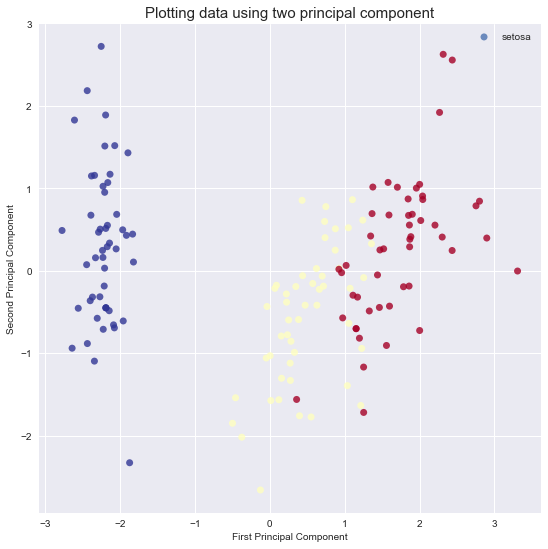

In [6]:
targets = ['setosa', 'versicolor', 'virginica']

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('First Principal Component', fontsize = 10)
ax.set_ylabel('Second Principal Component', fontsize = 10)
ax.set_title('Plotting data using two principal component', fontsize = 15)


plt_pr_df = pd.DataFrame(data=prcomp, columns=['pc_1', 'pc_2'])
plt_y_df = pd.DataFrame(data=y, columns=['y']) 
plt_df = pd.concat([plt_pr_df, plt_y_df], axis=1)
ax.scatter(plt_df['pc_1'], plt_df['pc_2'],
            c=plt_df['y'], edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('RdYlBu_r', 3))

#plt.colorbar();
ax.legend(targets)
plt.show()

From the above figure, it is clear that using PCA , we can clearly see three different classes. And thus PCA helps in data visualization and in exploratory analysis, we can get better insights into the data without running any classifier.


#### 4.3 PCA for Noise Filtering. <a name="filter_noise"></a>

Since PCA select the dimensional axis with maximum total projected variance after optimally rotating the dataset, it follows naturally that if there is the noise in the input dataset and if we apply PCA on it, it will filter out the noise since variance would be very less for noise.


To bring point home, we will take one image and artificially introduce various noise and see if PCA can remove noise.




We will load one of the images that is shipped with Scikit-learn. Let's first write some of utilities which we will be using multiple times:

1. **Normalize Image**: Since image rendered utility in scikit-learn can only display images in the range of 0-1, normalize image utility will divide it with 255 (which is the maximum color levels for RGB format). In above process, introduced noises might make image values to be less than 0 or more than 1, we will also make sure that the range is between 0 and 1.

2. **Plot Image**: This utility plots image using matplotlib utilities.

3. **Add Guassian Noise**:
  Since, in real life, Guassian noise is very common phenomenon, we will add a routine to add Guassian noise. This simulate the situation when we take a picture with noises i.e
    * There is over lighting like some flash or sun light, which is modelled by mean of color value.
    * And some noises like flickering which is introduced by variance.
  
  
 

In [7]:

def normalize_image(img):
    """
    Convert to floats instead of the default 8 bits integer coding. Dividing by
    255 is important so that plt.imshow behaves works well on float data (need to
    be in the range [0-1]). Basic idea is this.
    norm_image = np.array(image, dtype=np.float64) / 255
    """
    norm_img = np.array(img, dtype=np.float64) / 255
    
    w, h, d = original_shape = tuple(norm_img.shape)
    
    norm_img_1d = np.reshape(norm_img, (w * h* d, 1))
    norm_img_1d[norm_img_1d > 1.0] = 1
    norm_img_1d[norm_img_1d < 0.0] = 0
    norm_img = np.reshape(norm_img_1d, (w, h, d))
    return norm_img
    
def plot_color_image(img, title="Image"):
    """
    Utilty to plot image.
    """
    plt.figure(1)
    plt.clf()
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title(title)
    plt.imshow(img)
    plt.show()

def add_guassian_noise(image):
    """
    Add guassian noise. This simulate the situation when we take a picture 
    with noises 
    1) there is over lighting like some flash or sun light, which is introduce by mean 255
    2) and some noise like flickering which is introduce by variance 100
    """
    out = image + np.random.normal(255, 100, image.shape)
    return out


Let's load the "china.jpg" image and add some Guassian noise. This simulate the situation when we take a picture with noises  i.e
    
* There is over lighting like some flash or sun light, which is modelled by mean of color value.
* And some noises like flickering which is introduced by variance.
  

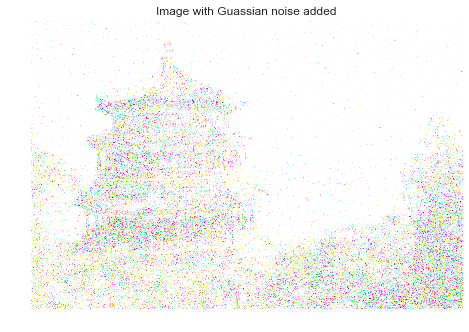

 Image dimensions =  (427, 640, 3)


In [8]:
# load china image
china_org = datasets.load_sample_image('china.jpg')  

w, h, d = original_shape = tuple(china_org.shape)
    
#plot_color_image(normalize_image(china_org))

# print(china_org.shape)

# add guassian noise to image
china_noisy_guass = add_guassian_noise(china_org)

china_noisy = china_noisy_guass

# plot the noisy image
plot_color_image(normalize_image(china_noisy), "Image with Guassian noise added")


print(" Image dimensions = ", china_noisy.shape)

What this image is? Kind of very difficult to answer it. Now lets use PCA to do noise reduction.

Typically, a image is represented by 2D array of pixels, where each pixel is of RGB color and there are $width \times height$ pixels. Thus, total dimensions of this image is $427 \times 640 \times 3 = 819840 $ i.e image has about $800k$ dimensions

Let's apply linear PCA to this. 

In [9]:
china_norm = normalize_image(china_org)

# we will combine color and height dimensions so as to confirm to api of linear PCA and KernelPCA

china_noisy_2d = np.reshape(china_noisy, (w ,h * d))


New dimensions of image =  426
Image reconstruction after linear PCA noise filtering


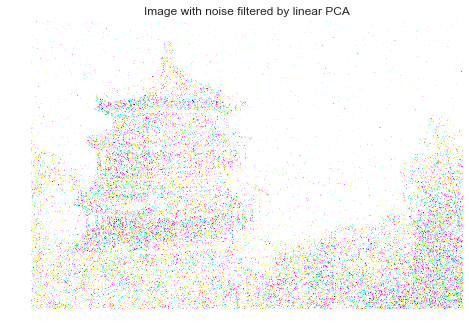

In [10]:
pca = PCA(0.9999)

pca = pca.fit(china_noisy_2d)

print("New dimensions of image = ", pca.n_components_)
print("Image reconstruction after linear PCA noise filtering")

# transform the noisy image using linear PCA
components = pca.transform(china_noisy_2d)
filtered = pca.inverse_transform(components)

# confirm image into orig 3D
china_filtered = np.reshape(filtered, (w , h, d))

plot_color_image(normalize_image(china_filtered), "Image with noise filtered by linear PCA")



We observe that:

1. Image's Dimensions reduces significantly from $800,000 $ to around $426$ thus resulting in big saving in data space storage in memory. 

2. But image is almost same as noisy image in previous sections.


To understand second issue, we have to understand that image is actually highly non-linear dataset and hence dimensions reduction using linear PCA probably does not achieve the best result.

Is there any better way to reconstructing image? Since image is non-linear data, how about using [KernelPCA](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis)? 
KernelPCA performs PCA in a new space whose dimensions are nonlinear. Interested user are encouraged to look into details about KernelPCA in previous links.

Kernel PCA is very typically used for:

* de-noising
* novelty detection


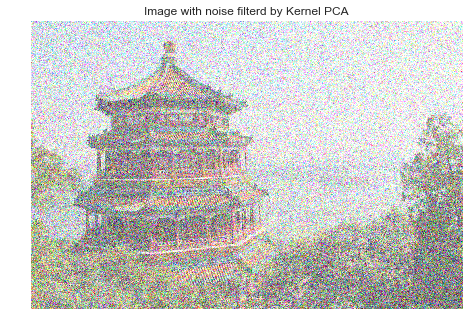

In [11]:

# create a kernel PCA transformer
# -with inverse_transform so that we can reduce the noise
# -gamma controls the strength of cohesiveness of two samples. higher gamma means not so much affected by noise.
# -we will remove zero eigenvector
# -we will let KernelPCA determine best number of dimensions

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=1000, remove_zero_eig = True, n_components = None)

kpca = kpca.fit(china_noisy_2d)

kcomponents = kpca.transform(china_noisy_2d)

# do inverse transform so as to filter our noise.
kfiltered = kpca.inverse_transform(kcomponents)

# get the 3D image from 2D versoin
china_kfiltered = np.reshape(kfiltered, (w , h, d))

plot_color_image(normalize_image(china_kfiltered), "Image with noise filterd by Kernel PCA")


Here, we can see that this is a picture of trees with a tower. Much better than images with noise and image with noise reduction by linear PCA. 

Now lets look at the original image.


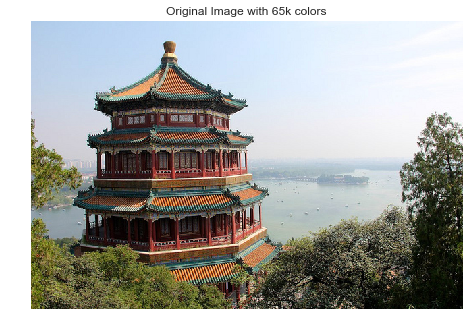

In [12]:
plot_color_image(normalize_image(china_org), "Original Image with 65k colors")



Thus, we saw that using Kernel PCA, we can remove noise from images.


#### 4.4 PCA as a Preprocessor for ML algorithms.<a name="pre_processor"></a>


We have seen how PCA rotates the dataset so that the dimensional axis align with maximum variance i.e eigenvectors of the Standardized Co-variance Matrix. Doing that allows us, to remove the dimensional axis where the variance is very little and thus achieving

1) Data Compression and Dimensional Reduction.
2) Reducing and Filtering Noise.
3) Making dataset more suitable for applying Machine Learning Algorithms

Last point is very important, as we know that most of the machine learning algorithms will perform great, when the data set is more relevant. This property allows us to us PCA as the pre-processing steps to machine learning algorithms (i.e logistic regression, support vector machine etc) and thus achieving better performance.

We will not go over the examples in this notebook but interested user can look at following examples to get more details

* [Using PCA increase performance of faces detection using SVM classification](http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py).

* [Using PCA to increase performance of K-means clustering](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py).



## 5. Summary.<a name="summary"></a>

Thus we have given a great details about PCA and various perspective.

* First, we looked at the PCA intuition.
* Second, we derived PCA from mathematical perspective and connected intuition with rigorous analyis.
* Then, we looked at various examples to illustrate various PCA applications like:
    * Dimension Reduction.
    * Visualization.
    * Noise Filtering.
    * PCA as pre-processor for better performance of ML algorithms.
    
    
We encourage user to try out various more examples and explore PCA to get deeper insights.    
Interested users are encouraged to looked at other alternatives to PCA:

* [T-SNE for visualization](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).
* [Isomap non linear dimensional reduction](https://en.wikipedia.org/wiki/Isomap).
* [Laplacian Eigenmaps for dimensionality Reduction](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Laplacian_eigenmaps).